In [1]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import time
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
import random
import scipy.stats as stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import statsmodels.api as sm
import pylab as py
import joblib
import matplotlib.patches as mpatches

In [2]:
%matplotlib widget

# Get Data

In [3]:
df = pd.read_csv('features.csv')
df.dropna(inplace = True)
df.reset_index(inplace = True)
df = df[df.columns[1:]]
df

,unixTime,Gap hourly mean,Gap daily mean,Gap hourly median,Gap daily median,Gap hourly max,Gap daily max,Gap hourly min,Gap daily min,Gap hourly std dev,...,rain hourly median,rain daily median,rain hourly max,rain daily max,rain hourly min,rain daily min,rain hourly std dev,rain daily std dev,rain,future soilHum
0,1.626954e+09,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.792780
1,1.626954e+09,59.500000,59.50000,59.5,59.5,119.0,119.0,0.0,0.0,59.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.792129
2,1.626954e+09,60.000000,60.00000,61.0,61.0,119.0,119.0,0.0,0.0,48.586692,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.791498
3,1.626954e+09,60.000000,60.00000,60.5,60.5,119.0,119.0,0.0,0.0,42.077310,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.790883
4,1.626954e+09,60.200000,60.20000,61.0,61.0,119.0,119.0,0.0,0.0,37.637216,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.790286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205247,1.642314e+09,60.716667,60.72312,61.0,61.0,61.0,61.0,60.0,60.0,0.450617,...,0.001405,0.001405,0.001405,0.002813,0.001405,0.0,6.505213e-19,0.001325,0.001405,1.087440
205248,1.642314e+09,60.733333,60.72312,61.0,61.0,61.0,61.0,60.0,60.0,0.442217,...,0.001405,0.001405,0.001405,0.002813,0.001405,0.0,6.505213e-19,0.001325,0.001405,1.087988
205249,1.642314e+09,60.716667,60.72312,61.0,61.0,61.0,61.0,60.0,60.0,0.450617,...,0.001405,0.001405,0.001405,0.002813,0.001405,0.0,6.505213e-19,0.001324,0.001405,1.088382
205250,1.642315e+09,60.716667,60.72312,61.0,61.0,61.0,61.0,60.0,60.0,0.450617,...,0.001405,0.001405,0.001405,0.002813,0.001405,0.0,6.505213e-19,0.001323,0.001405,1.088618


# Normalise Data

In [5]:
transformer = StandardScaler().fit(df)
dfn = transformer.transform(df)
colNames = df.columns
print(list(df.columns))
dfn = pd.DataFrame(dfn, columns=colNames)
dfn

['unixTime', 'Gap hourly mean', 'Gap daily mean', 'Gap hourly median', 'Gap daily median', 'Gap hourly max', 'Gap daily max', 'Gap hourly min', 'Gap daily min', 'Gap hourly std dev', 'Gap daily std dev', 'Gap', 'airHum hourly mean', 'airHum daily mean', 'airHum hourly median', 'airHum daily median', 'airHum hourly max', 'airHum daily max', 'airHum hourly min', 'airHum daily min', 'airHum hourly std dev', 'airHum daily std dev', 'airHum', 'airTemp hourly mean', 'airTemp daily mean', 'airTemp hourly median', 'airTemp daily median', 'airTemp hourly max', 'airTemp daily max', 'airTemp hourly min', 'airTemp daily min', 'airTemp hourly std dev', 'airTemp daily std dev', 'airTemp', 'wind hourly mean', 'wind daily mean', 'wind hourly median', 'wind daily median', 'wind hourly max', 'wind daily max', 'wind hourly min', 'wind daily min', 'wind hourly std dev', 'wind daily std dev', 'wind', 'soilHum hourly mean', 'soilHum daily mean', 'soilHum hourly median', 'soilHum daily median', 'soilHum hour

,unixTime,Gap hourly mean,Gap daily mean,Gap hourly median,Gap daily median,Gap hourly max,Gap daily max,Gap hourly min,Gap daily min,Gap hourly std dev,...,rain hourly median,rain daily median,rain hourly max,rain daily max,rain hourly min,rain daily min,rain hourly std dev,rain daily std dev,rain,future soilHum
0,-1.576767,-0.132714,-0.148846,-0.137669,-0.150288,-0.075757,-0.217029,0.008815,0.115807,-0.052392,...,-0.149494,-0.289105,-0.154769,-0.254575,-0.144029,-0.126008,-0.061825,-0.251389,-0.149238,-0.448030
1,-1.576741,-0.023328,-0.024914,-0.012242,-0.007668,-0.033340,-0.209056,0.008815,0.115807,0.017465,...,-0.149494,-0.289105,-0.154769,-0.254575,-0.144029,-0.126008,-0.061825,-0.251389,-0.149238,-0.449729
2,-1.576728,-0.022409,-0.023872,-0.009080,-0.004073,-0.033340,-0.209056,0.008815,0.115807,0.004653,...,-0.149494,-0.289105,-0.154769,-0.254575,-0.144029,-0.126008,-0.061825,-0.251389,-0.149238,-0.451379
3,-1.576715,-0.022409,-0.023872,-0.010134,-0.005271,-0.033340,-0.209056,0.008815,0.115807,-0.002990,...,-0.149494,-0.289105,-0.154769,-0.254575,-0.144029,-0.126008,-0.061825,-0.251389,-0.149238,-0.452982
4,-1.576702,-0.022042,-0.023456,-0.009080,-0.004073,-0.033340,-0.209056,0.008815,0.115807,-0.008203,...,-0.149494,-0.289105,-0.154769,-0.254575,-0.144029,-0.126008,-0.061825,-0.251389,-0.149238,-0.454543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205247,1.735430,-0.021092,-0.022366,-0.009080,-0.004073,-0.054014,-0.212942,0.023714,0.118908,-0.051863,...,-0.143094,-0.252366,-0.148809,-0.248532,-0.137081,-0.126008,-0.061825,-0.244043,-0.142841,0.321354
205248,1.735443,-0.021061,-0.022366,-0.009080,-0.004073,-0.054014,-0.212942,0.023714,0.118908,-0.051872,...,-0.143094,-0.252366,-0.148809,-0.248532,-0.137081,-0.126008,-0.061825,-0.244047,-0.142841,0.322784
205249,1.735456,-0.021092,-0.022366,-0.009080,-0.004073,-0.054014,-0.212942,0.023714,0.118908,-0.051863,...,-0.143094,-0.252366,-0.148809,-0.248532,-0.137081,-0.126008,-0.061825,-0.244050,-0.142841,0.323812
205250,1.735470,-0.021092,-0.022366,-0.009080,-0.004073,-0.054014,-0.212942,0.023714,0.118908,-0.051863,...,-0.143094,-0.252366,-0.148809,-0.248532,-0.137081,-0.126008,-0.061825,-0.244054,-0.142841,0.324429


# Wilcoxon Signed-Rank Test

In [6]:
raw = df[['airHum', 'airTemp', 'soilHum', 'soilTemp', 'wind', 'light', '(water on/off)', 'rain']]
raw = raw.sort_values('soilHum').reset_index()
raw

,index,airHum,airTemp,soilHum,soilTemp,wind,light,(water on/off),rain
0,198172,99.9,21.730797,0.105928,21.574118,32.790505,65535.0,0.0,0.0
1,198173,99.9,21.801227,0.105941,21.575294,32.797020,65535.0,0.0,0.0
2,198171,99.9,21.663938,0.106049,21.572941,32.785069,65535.0,0.0,0.0
3,198174,99.9,21.875418,0.106113,21.576471,32.804648,65535.0,0.0,0.0
4,198170,99.9,21.600452,0.106280,21.571765,32.780642,65535.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
205247,101684,99.9,14.706714,3.261372,16.045882,5.272509,18005.0,0.0,0.0
205248,101688,99.9,14.758415,3.261422,16.043529,5.021906,19820.0,0.0,0.0
205249,101685,99.9,14.718399,3.261482,16.045882,5.209230,20363.0,0.0,0.0
205250,101687,99.9,14.744225,3.261508,16.043529,5.083674,21871.0,0.0,0.0


In [7]:
split = np.median(raw['soilHum'])
print(split)
low = raw.loc[raw['soilHum'] < split]
high = raw.loc[raw['soilHum'] >= split]

1.020138304419856


# Make Violin Plots

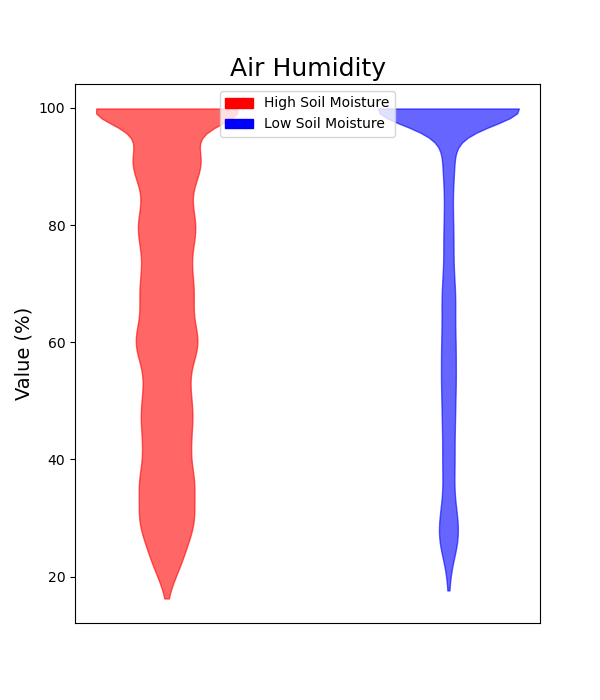

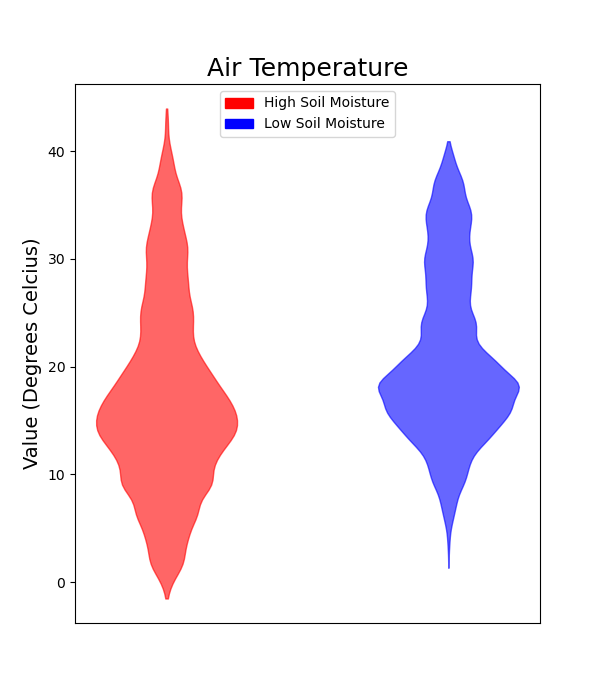

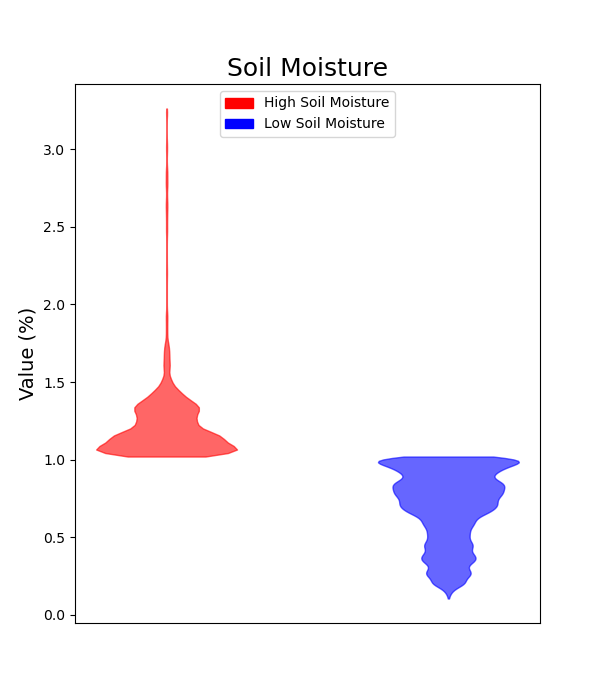

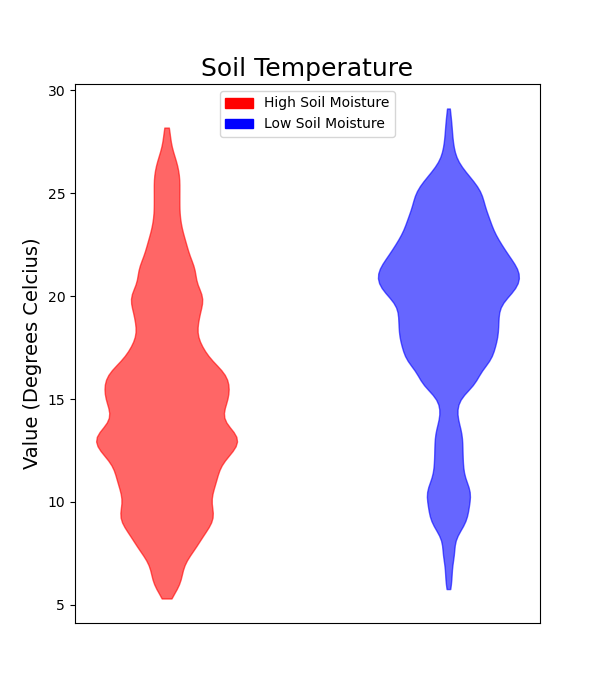

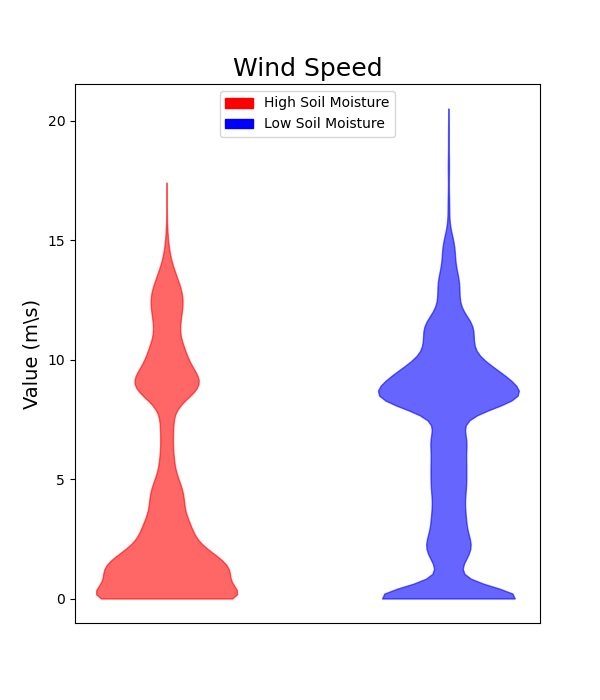

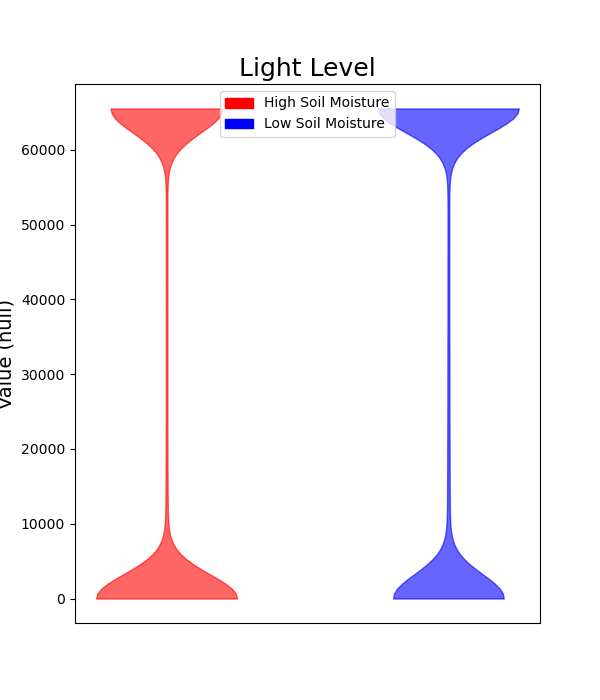

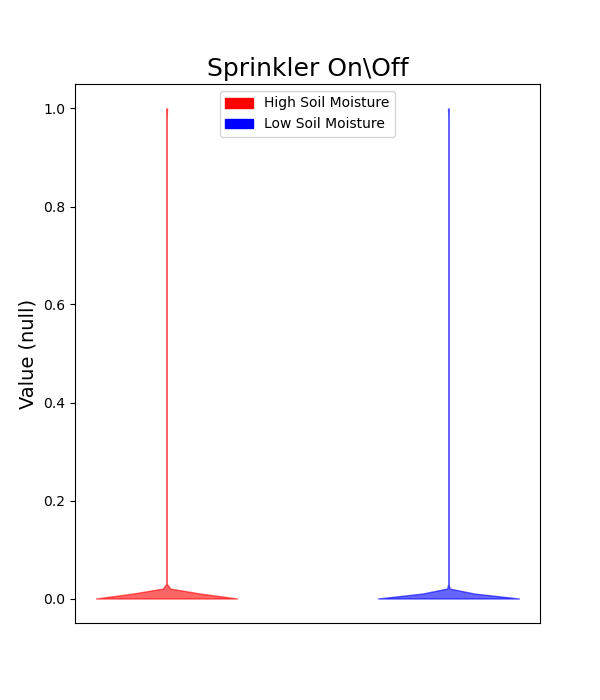

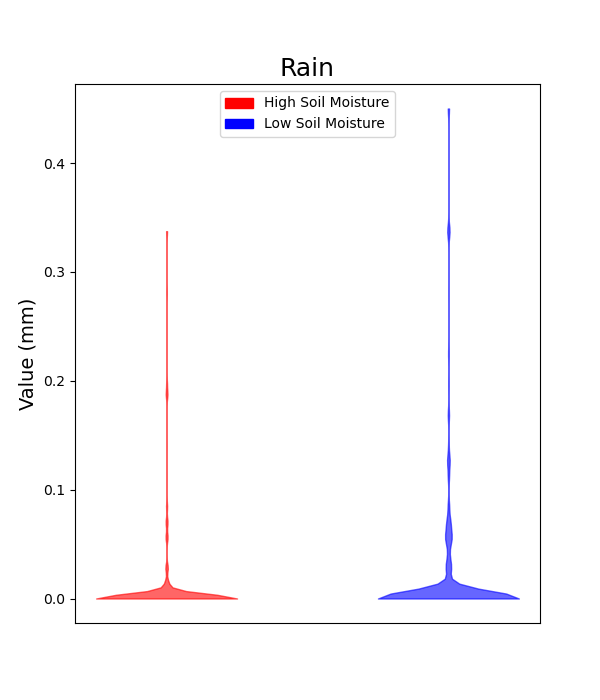

In [10]:
titles = ['Air Humidity', 'Air Temperature', 'Soil Moisture', 'Soil Temperature', 'Wind Speed', 'Light Level','Sprinkler On\Off','Rain']
units = ['%', 'Degrees Celcius', '%', 'Degrees Celcius', 'm\s', 'null', 'null' ,'mm']
for n, col in enumerate(high.columns[1:]):
    fig, axs = plt.subplots(figsize=[6,7])
    axs.set_title(titles[n], fontsize=18)
    axs.set_ylabel('Value (' + units[n] + ')',fontsize=14)
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False
    ) # labels along the bottom edge are off
    if titles[n] == 'Wind Speed':
        top = axs.violinplot(high[col]/4, [0],  showextrema=False)
        bottom = axs.violinplot(low[col]/4, [1], showextrema=False)
    elif titles[n] == 'Rain':
        top = axs.violinplot(high[col].loc[(high[col] >= 0) & (high[col] <= 0.5)], [0],  showextrema=False)
        bottom = axs.violinplot(low[col].loc[(low[col] >= 0) & (low[col] <= 0.5)], [1], showextrema=False)
    else:
        top = axs.violinplot(high[col], [0],  showextrema=False)
        bottom = axs.violinplot(low[col], [1], showextrema=False)
    for x in top['bodies']:
        x.set_facecolor('red')
        x.set_edgecolor('red')
        x.set_alpha(.6)
    for x in bottom['bodies']:
        x.set_facecolor('blue')
        x.set_edgecolor('blue')
        x.set_alpha(.6)
    red_patch = mpatches.Patch(color='red', label='High Soil Moisture')
    blue_patch = mpatches.Patch(color='blue', label='Low Soil Moisture')
    axs.legend(handles=[red_patch, blue_patch], loc='upper center')


In [12]:
for col in raw.columns:
    print(col)
    difs = np.array(high[col])-np.array(low[col])
    print(stats.wilcoxon(difs, alternative='two-sided', mode='approx'), col, high[col].shape, low[col].shape)
    print()

index
WilcoxonResult(statistic=1036375645.0, pvalue=0.0) index (102626,) (102626,)

airHum
WilcoxonResult(statistic=1615474205.0, pvalue=0.0) airHum (102626,) (102626,)

airTemp
WilcoxonResult(statistic=1719926930.0, pvalue=0.0) airTemp (102626,) (102626,)

soilHum
WilcoxonResult(statistic=0.0, pvalue=0.0) soilHum (102626,) (102626,)

soilTemp
WilcoxonResult(statistic=1029391340.0, pvalue=0.0) soilTemp (102626,) (102626,)

wind
WilcoxonResult(statistic=1771545548.5, pvalue=0.0) wind (102626,) (102626,)

light
WilcoxonResult(statistic=765941081.5, pvalue=0.0) light (102626,) (102626,)

(water on/off)
WilcoxonResult(statistic=330985.0, pvalue=1.0280084075425797e-07) (water on/off) (102626,) (102626,)

rain
WilcoxonResult(statistic=310342851.5, pvalue=0.0) rain (102626,) (102626,)



# Model Training

In [13]:
dfn.dropna(inplace=True)

df_chunks = np.array_split(dfn, 130)
df_train = []
df_test = []
for n, x in enumerate(df_chunks):
    if n%5 == 0:
        df_test.append(x)
    else:
        df_train.append(x)
df_test = pd.concat(df_test, axis=0)
df_train = pd.concat(df_train, axis=0)
df_test

,unixTime,Gap hourly mean,Gap daily mean,Gap hourly median,Gap daily median,Gap hourly max,Gap daily max,Gap hourly min,Gap daily min,Gap hourly std dev,...,rain hourly median,rain daily median,rain hourly max,rain daily max,rain hourly min,rain daily min,rain hourly std dev,rain daily std dev,rain,future soilHum
0,-1.576767,-0.132714,-0.148846,-0.137669,-0.150288,-0.075757,-0.217029,0.008815,0.115807,-0.052392,...,-0.149494,-0.289105,-0.154769,-0.254575,-0.144029,-0.126008,-0.061825,-0.251389,-0.149238,-0.448030
1,-1.576741,-0.023328,-0.024914,-0.012242,-0.007668,-0.033340,-0.209056,0.008815,0.115807,0.017465,...,-0.149494,-0.289105,-0.154769,-0.254575,-0.144029,-0.126008,-0.061825,-0.251389,-0.149238,-0.449729
2,-1.576728,-0.022409,-0.023872,-0.009080,-0.004073,-0.033340,-0.209056,0.008815,0.115807,0.004653,...,-0.149494,-0.289105,-0.154769,-0.254575,-0.144029,-0.126008,-0.061825,-0.251389,-0.149238,-0.451379
3,-1.576715,-0.022409,-0.023872,-0.010134,-0.005271,-0.033340,-0.209056,0.008815,0.115807,-0.002990,...,-0.149494,-0.289105,-0.154769,-0.254575,-0.144029,-0.126008,-0.061825,-0.251389,-0.149238,-0.452982
4,-1.576702,-0.022042,-0.023456,-0.009080,-0.004073,-0.033340,-0.209056,0.008815,0.115807,-0.008203,...,-0.149494,-0.289105,-0.154769,-0.254575,-0.144029,-0.126008,-0.061825,-0.251389,-0.149238,-0.454543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198935,1.652778,-0.021092,-0.022365,-0.009080,-0.004073,-0.054014,-0.212942,0.023714,0.118908,-0.051863,...,-0.149494,-0.289105,-0.154769,-0.254575,-0.144029,-0.126008,-0.061825,-0.251389,-0.149238,0.305718
198936,1.652791,-0.021092,-0.022363,-0.009080,-0.004073,-0.054014,-0.212942,0.023714,0.118908,-0.051863,...,-0.149494,-0.289105,-0.154769,-0.254575,-0.144029,-0.126008,-0.061825,-0.251389,-0.149238,0.305974
198937,1.652804,-0.021061,-0.022363,-0.009080,-0.004073,-0.054014,-0.212942,0.023714,0.118908,-0.051872,...,-0.149494,-0.289105,-0.154769,-0.254575,-0.144029,-0.126008,-0.061825,-0.251389,-0.149238,0.306090
198938,1.652817,-0.021092,-0.022365,-0.009080,-0.004073,-0.054014,-0.212942,0.023714,0.118908,-0.051863,...,-0.149494,-0.289105,-0.154769,-0.254575,-0.144029,-0.126008,-0.061825,-0.251389,-0.149238,0.306068


In [14]:
if 'unixTime' in df_train:
    df_train.drop(columns='unixTime', inplace=True)
if 'unixTime' in df_test:
    df_test.drop(columns='unixTime', inplace=True)

print(df_train.shape)
print(df_test.shape)

(164201, 100)
(41051, 100)


In [24]:
regrs = [RandomForestRegressor(max_depth=300, max_features=4, min_samples_leaf=5, n_jobs=-1, verbose=1),
         MLPRegressor(alpha=0.01, tol=1e-10, learning_rate='invscaling', verbose=True),
         SVR(C=2.0, epsilon=0.2, kernel='poly', degree=33, verbose=True, cache_size=1000),
         KNeighborsRegressor(n_neighbors=10, weights='uniform', n_jobs=-1),
         linear_model.Lasso(alpha=0.1),
         LinearSVR(random_state=0, tol=1e-5, verbose=1, max_iter= 10000)]

y_true = df_test['future soilHum']
preds = {}
mses = {}

In [13]:
# Random Forest
regrs[0].fit(df_train.loc[:, df_train.columns != 'future soilHum'], df_train['future soilHum'])
y_pred = regrs[0].predict(df_test.loc[:, df_test.columns != 'future soilHum'])
preds['Random Forest'] = [y_true, y_pred, df.iloc[df_test.index]['unixTime']]
mse = mean_squared_error(y_true, y_pred)
mses['Random Forest'] = mse
print(mse)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s


0.2601501321634159


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [25]:
regrs[0].fit(df_train.loc[:, df_train.columns != 'future soilHum'], df_train['future soilHum'])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.8s finished


RandomForestRegressor(max_depth=300, max_features=4, min_samples_leaf=5,
                      n_jobs=-1, verbose=1)

In [32]:
from timeit import default_timer as timer
start = timer()
regrs[0].predict(df_test.loc[:, df_test.columns != 'future soilHum'])
end = timer()
print('time: ', end-start)
print(df_test.loc[:, df_test.columns != 'future soilHum'].shape)

time:  0.13034380006138235
(41051, 99)


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [14]:
joblib.dump(regrs[0], 'rf.joblib')

['rf.joblib']

In [15]:
df_test.loc[:, df_test.columns != 'future soilHum'].shape

(41051, 99)

In [16]:
# Neural Network
regrs[1].fit(df_train.loc[:, df_train.columns != 'future soilHum'], df_train['future soilHum'])
y_pred = regrs[1].predict(df_test.loc[:, df_test.columns != 'future soilHum'])
preds['Neural Network'] = [y_true, y_pred, df.iloc[df_test.index]['unixTime']]
mse = mean_squared_error(y_true, y_pred)
mses['Neural Network'] = mse
print(mse)

Iteration 1, loss = 0.20922566
Iteration 2, loss = 0.14458247
Iteration 3, loss = 0.10234402
Iteration 4, loss = 0.08793600
Iteration 5, loss = 0.12998663
Iteration 6, loss = 0.11198021
Iteration 7, loss = 0.18933104
Iteration 8, loss = 0.07001738
Iteration 9, loss = 0.05145070
Iteration 10, loss = 0.05039491
Iteration 11, loss = 0.05260454
Iteration 12, loss = 0.16682056
Iteration 13, loss = 0.32206957
Iteration 14, loss = 0.09509322
Iteration 15, loss = 0.04195647
Iteration 16, loss = 0.05953276
Iteration 17, loss = 0.17826758
Iteration 18, loss = 0.12862003
Iteration 19, loss = 0.11007156
Iteration 20, loss = 0.07630988
Iteration 21, loss = 0.12263111
Iteration 22, loss = 0.05201805
Iteration 23, loss = 0.09087083
Iteration 24, loss = 0.57304230
Iteration 25, loss = 0.09956131
Iteration 26, loss = 0.12961005
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.
1.2521190490663237


In [17]:
# Lasso Regression
regrs[4].fit(df_train.loc[:, df_train.columns != 'future soilHum'], df_train['future soilHum'])
y_pred = regrs[4].predict(df_test.loc[:, df_test.columns != 'future soilHum'])
preds['Lasso Regression'] = [y_true, y_pred, df.iloc[df_test.index]['unixTime']]
mse = mean_squared_error(y_true, y_pred)
mses['Lasso Regression'] = mse
print(mse)

0.31939464049262506


In [18]:
# SVR sample
print('fit start')
tot = df_train.loc[:, df_test.columns != 'future soilHum']
indeces = list(df_train.index.values)
random.Random(9).shuffle(indeces)
indeces = indeces[:80000]
train_sample = tot.loc[indeces]
train_sample_true = df_train['future soilHum'].loc[indeces]
print('train sample aquired')
regrs[2].fit(train_sample, train_sample_true)
print('fit done')
tot = df_test.loc[:, df_test.columns != 'future soilHum']
indeces = list(df_test.index.values)
random.Random(9).shuffle(indeces)
indeces = indeces[:30000]
# print(indeces)
sample = tot.loc[indeces]
sample_true = df_test['future soilHum'].loc[indeces]
print('sample aquired')
sample_pred = regrs[2].predict(sample)
preds['SVR'] = [sample_true, sample_pred, df.loc[indeces]['unixTime']]
mse = mean_squared_error(sample_true, sample_pred)
mses['SVR'] = mse
print(mse)

In [19]:
# K neighbours
print('fit start')
regrs[3].fit(df_train.loc[:, df_train.columns != 'future soilHum'], df_train['future soilHum'])
print('fit done')
tot = df_test.loc[:, df_test.columns != 'future soilHum']
indeces = list(df_test.index.values)
random.Random(9).shuffle(indeces)
indeces = indeces[:100000]
# print(indeces)
sample = tot.loc[indeces]
sample_true = df_test['future soilHum'].loc[indeces]
print('sample aquired')
sample_pred = regrs[3].predict(sample)
preds['K Nearest Neighbours'] = [sample_true, sample_pred, df.loc[indeces]['unixTime']]
mse = mean_squared_error(sample_true, sample_pred)
mses['K Nearest nieghbours'] = mse
print(mse)

fit start
fit done
sample aquired
0.6562404279577314


In [20]:
# Linear SVR
regrs[5].fit(df_train.loc[:, df_train.columns != 'future soilHum'], df_train['future soilHum'])
y_pred = regrs[5].predict(df_test.loc[:, df_test.columns != 'future soilHum'])
preds['SVR'] = [y_true, y_pred, df.iloc[df_test.index]['unixTime']]
mse = mean_squared_error(y_true, y_pred)
mses['SVR'] = mse
print(mse)

[LibLinear]0.31162947670784263


C:\Users\Milo Shan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [21]:
# Get Range
print(np.max(y_true) - np.min(y_true))
print(np.max(y_true), np.min(y_true))

6.107311784019167
3.9478605113216387 -2.1594512726975283


In [83]:
print([.5*x for x in range(-5,9)])

[-2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]


              abs error  observed value  binMids
bin                                             
(-2.5, -2.0]   0.940695       -2.094812    -2.25
(-2.0, -1.5]   0.758638       -1.748339    -1.75
(-1.5, -1.0]   0.355615       -1.321585    -1.25
(-1.0, -0.5]   0.393617       -0.684408    -0.75
(-0.5, 0.0]    0.275997       -0.315352    -0.25
(0.0, 0.5]     0.220623        0.277445     0.25
(0.5, 1.0]     0.187466        0.703998     0.75
(1.0, 1.5]     0.091173        1.177031     1.25
(1.5, 2.0]     1.164602        1.757662     1.75
(2.0, 2.5]     1.469983        2.259884     2.25
(2.5, 3.0]     1.782290        2.741787     2.75
(3.0, 3.5]     2.337410        3.302993     3.25
(3.5, 4.0]     0.147491        3.764238     3.75

              abs error  observed value  binMids
bin                                             
(-2.5, -2.0]   0.887354       -2.094812    -2.25
(-2.0, -1.5]   0.799820       -1.748488    -1.75
(-1.5, -1.0]   1.015536       -1.321585    -1.25
(-1.0, -0.5]   0.58

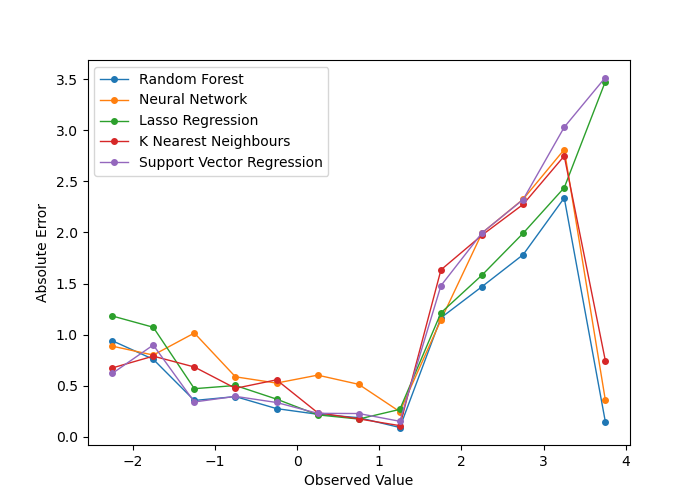

In [114]:
# error graphs

fig, ax = plt.subplots(figsize=(7,5))
for i in preds:
    errorDf = pd.DataFrame({'abs error':abs(preds[i][1]-preds[i][0]), 'observed value':preds[i][0]}).sort_values('observed value')
    errorDf = errorDf[errorDf['abs error'] < 20]
    binEdges = [.5*x for x in range(-5,9)]
    errorDf['bin'] = pd.cut(errorDf['observed value'], bins=binEdges)
    errorDf = errorDf.groupby(['bin']).mean()
    errorDf['binMids'] = [(x + binEdges[n+1])/2 for n, x in enumerate(binEdges[:-1])]
#     print(errorDf)
#     print()
    x = errorDf['binMids']
    y = errorDf['abs error']
#     y = np.histogram(abs(errorDf['observed value']-errorDf['predicted value']), bins='fd')
#     print(y)
    if i =='SVR':
        ax.plot(x, y, label='Support Vector Regression', marker='o', markersize=4, linewidth='1')
    else:
        ax.plot(x, y, label=i, marker='o', markersize=4, linewidth='1')
    ax.set_xlabel('Observed Value')
    ax.set_ylabel('Absolute Error')
plt.legend()

# Results

In [23]:
# MSEs
print(mses)

{'Random Forest': 0.2535339504011762, 'Neural Network': 1.475958037029214, 'Lasso Regression': 0.31939464049262506, 'K Nearest nieghbours': 0.6562404279577314, 'SVR': 0.31162947670784263}


In [25]:
# R values
rs = pd.DataFrame()
for x in preds:
    print(x)
    corr_matrix = np.corrcoef(preds[x][0], preds[x][1])
    rs[x] = [corr_matrix[0,1]]
rs

Random Forest
Neural Network
Lasso Regression
K Nearest Neighbours
SVR


,Random Forest,Neural Network,Lasso Regression,K Nearest Neighbours,SVR
0,0.842486,0.442004,0.787852,0.623972,0.780734


In [69]:
start_time = time.time()
importances = regrs[0].feature_importances_
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.086 seconds


Past Soil Moisture     0.033695
Soil Temperature       0.015837
Wind                   0.010937
Air Humidity           0.008979
Air Temperature        0.007898
Light Level            0.005114
Rainfall               0.004368
Gap Between Reading    0.002741
Spinkler on/off        0.001340
dtype: float64


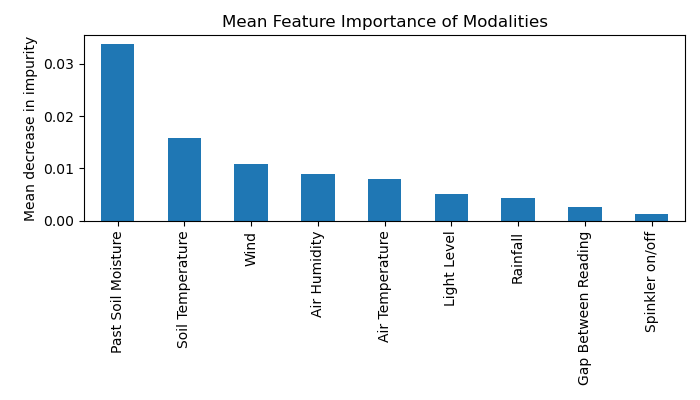

In [70]:
feature_names_raw = df_train.columns[:-1]
titles = ['Gap Between Reading', 'Air Humidity', 'Air Temperature', 'Wind', 'Past Soil Moisture', 'Soil Temperature', 'Light Level', 'Spinkler on/off', 'Rainfall']

feature_names = []
for n, x in enumerate(feature_names_raw):
    if int(n/11) != 7:
        feature_names.append(' '.join([titles[int(n/11)]] + feature_names_raw[n].split(' ')[1:]))
    else:
        feature_names.append(' '.join([titles[int(n/11)]] + feature_names_raw[n].split(' ')[2:]))
regr_importances = [pd.Series(importances, index=feature_names)[x:x+11].mean() for x in range(0, 99, 11)]
regr_importances = pd.Series(regr_importances, index=titles).sort_values(ascending = False)
# regr_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(regr_importances)
fig, ax = plt.subplots(figsize=[7, 4])
regr_importances.plot.bar()
plt.title("Mean Feature Importance of Modalities")
plt.ylabel("Mean decrease in impurity")
fig.tight_layout()